In [1]:
import os
import yaml

import numpy as np

# from conteva import Conteva

# bounding_box_filename = '/home/tmn/ws_caric/src/caric_mission/models/mbs/bounding_boxes/box_description.yaml'
# bounding_box_filename = '/home/tmn/ws_caric/src/caric_mission/models/hangar/bounding_boxes/box_description.yaml'
bounding_box_filename = '/home/paobuliao/ws_caric/src/caric_mission/models/mbs/bounding_boxes/box_description.yaml'

def get_phase(point1,point2):
    if point2[0]>point1[0] and point2[1]>point1[1] and point2[2]>point1[2]:
        phase=1
    elif point2[0]<point1[0] and point2[1]>point1[1] and point2[2]>point1[2]:
        phase=2
    elif point2[0]<point1[0] and point2[1]<point1[1] and point2[2]>point1[2]:
        phase=3
    elif point2[0]>point1[0] and point2[1]<point1[1] and point2[2]>point1[2]:
        phase=4
    elif point2[0]>point1[0] and point2[1]>point1[1] and point2[2]<point1[2]:
        phase=5
    elif point2[0]<point1[0] and point2[1]>point1[1] and point2[2]<point1[2]:
        phase=6
    elif point2[0]<point1[0] and point2[1]<point1[1] and point2[2]<point1[2]:
        phase=7
    elif point2[0]>point1[0] and point2[1]<point1[1] and point2[2]<point1[2]:
        phase=8
    return phase

def get_face_points(center, size, orientation,resolution):
    
    # Calculate the half sizes
    half_sizes = size / 2.0
    
    # Define the eight vertices of the rectangle
    vertices = np.array([ [-half_sizes[0], -half_sizes[1], -half_sizes[2]],
                          [ half_sizes[0], -half_sizes[1], -half_sizes[2]],
                          [ half_sizes[0],  half_sizes[1], -half_sizes[2]],
                          [-half_sizes[0],  half_sizes[1], -half_sizes[2]],
                          [-half_sizes[0], -half_sizes[1],  half_sizes[2]],
                          [ half_sizes[0], -half_sizes[1],  half_sizes[2]],
                          [ half_sizes[0],  half_sizes[1],  half_sizes[2]],
                          [-half_sizes[0],  half_sizes[1],  half_sizes[2]]
                        ])

    # Rotate the vertices around the center
    rotation_matrix = orientation
    rotated_vertices = np.dot(vertices, rotation_matrix.T)

    # Translate the rotated vertices to the center position
    translated_vertices = rotated_vertices + center

    # Create the mesh, each triang has two sides
    faces = np.array([
                        # Bottom face
                        [0, 1, 2, 3],
                        # Top face
                        [4, 5, 6, 7],
                        # Side faces
                        [0, 4, 5, 1],
                        [1, 5, 6, 2],
                        [2, 6, 7, 3],
                        [3, 7, 4, 0],
                     ])

    resolution=resolution/2.#我采用哪个栅格的一半，保证都覆盖
    face_points=[]
    for i,face in enumerate(faces):#遍历每个面
        start_vetex=translated_vertices[face[0]].copy()#取出面的第一个顶点
        
        aux1_vetex=translated_vertices[face[1]].copy()#这个面上的另一个定点，不是对角那个
        aux2_vetex=translated_vertices[face[3]].copy()

        move1_vetex=np.array([0.,0.,0.])
        move2_vetex=np.array([0.,0.,0.])

        vec1=(aux1_vetex-start_vetex)/(((aux1_vetex-start_vetex).dot(aux1_vetex-start_vetex))**0.5)#获取两个边方向上的单位向量
        vec2=(aux2_vetex-start_vetex)/(((aux2_vetex-start_vetex).dot(aux2_vetex-start_vetex))**0.5)

        while np.linalg.norm(move1_vetex)<np.linalg.norm(aux1_vetex-start_vetex):
            move2_vetex=np.array([0.,0.,0.])
            while np.linalg.norm(move2_vetex)<np.linalg.norm(aux2_vetex-start_vetex):
                face_points.append(start_vetex+move1_vetex+move2_vetex)
                # print(start_vetex+move1_vetex+move2_vetex)
                move2_vetex+=vec2*resolution
                # print(move2_vetex-start_vetex)
            move1_vetex+=vec1*resolution
            # print(move2_vetex-start_vetex)
        print(len(face_points))
    return face_points




In [2]:
def get_all_points(center, size, orientation,resolution):
    
    # Calculate the half sizes
    half_sizes = size / 2.0
    
    # Define the eight vertices of the rectangle
    vertices = np.array([ [-half_sizes[0], -half_sizes[1], -half_sizes[2]],
                          [ half_sizes[0], -half_sizes[1], -half_sizes[2]],
                          [ half_sizes[0],  half_sizes[1], -half_sizes[2]],
                          [-half_sizes[0],  half_sizes[1], -half_sizes[2]],
                          [-half_sizes[0], -half_sizes[1],  half_sizes[2]],
                          [ half_sizes[0], -half_sizes[1],  half_sizes[2]],
                          [ half_sizes[0],  half_sizes[1],  half_sizes[2]],
                          [-half_sizes[0],  half_sizes[1],  half_sizes[2]]
                        ])

    # Rotate the vertices around the center
    rotation_matrix = orientation
    rotated_vertices = np.dot(vertices, rotation_matrix.T)

    # Translate the rotated vertices to the center position
    translated_vertices = rotated_vertices + center

    resolution=resolution/2.#我采用哪个栅格的一半，保证都覆盖
    all_points=[]
    start_vetex=translated_vertices[0].copy()#取出面的第一个顶点
    
    aux1_vetex=translated_vertices[1].copy()#这个面上的另一个定点，不是对角那个
    aux2_vetex=translated_vertices[3].copy()
    aux3_vetex=translated_vertices[4].copy()

    move1_vetex=np.array([0.,0.,0.])
    move2_vetex=np.array([0.,0.,0.])
    move3_vetex=np.array([0.,0.,0.])

    vec1=(aux1_vetex-start_vetex)/(((aux1_vetex-start_vetex).dot(aux1_vetex-start_vetex))**0.5)#获取两个边方向上的单位向量
    vec2=(aux2_vetex-start_vetex)/(((aux2_vetex-start_vetex).dot(aux2_vetex-start_vetex))**0.5)
    vec3=(aux3_vetex-start_vetex)/(((aux3_vetex-start_vetex).dot(aux3_vetex-start_vetex))**0.5)

    while np.linalg.norm(move1_vetex)<np.linalg.norm(aux1_vetex-start_vetex):
        move2_vetex=np.array([0.,0.,0.])
        while np.linalg.norm(move2_vetex)<np.linalg.norm(aux2_vetex-start_vetex):
            move3_vetex=np.array([0.,0.,0.])
            while np.linalg.norm(move3_vetex)<np.linalg.norm(aux3_vetex-start_vetex):
                all_points.append(start_vetex+move1_vetex+move2_vetex+move3_vetex)
                move3_vetex+=vec3*resolution
            # print(start_vetex+move1_vetex+move2_vetex)
            move2_vetex+=vec2*resolution
            # print(move2_vetex-start_vetex)
        move1_vetex+=vec1*resolution
        # print(move2_vetex-start_vetex)
    # print(len(all_points))
    return all_points

In [3]:
def get_cube_vertices(center, size, orientation):
    # Calculate the half sizes
    half_sizes = size / 2.0
    
    # Define the eight vertices of the rectangle
    vertices = np.array([ [-half_sizes[0], -half_sizes[1], -half_sizes[2]],
                          [ half_sizes[0], -half_sizes[1], -half_sizes[2]],
                          [ half_sizes[0],  half_sizes[1], -half_sizes[2]],
                          [-half_sizes[0],  half_sizes[1], -half_sizes[2]],
                          [-half_sizes[0], -half_sizes[1],  half_sizes[2]],
                          [ half_sizes[0], -half_sizes[1],  half_sizes[2]],
                          [ half_sizes[0],  half_sizes[1],  half_sizes[2]],
                          [-half_sizes[0],  half_sizes[1],  half_sizes[2]]
                        ])

    # Rotate the vertices around the center
    rotation_matrix = orientation
    rotated_vertices = np.dot(vertices, rotation_matrix.T)

    # Translate the rotated vertices to the center position
    translated_vertices = rotated_vertices + center
    return translated_vertices

In [4]:
def is_point_inside_cube(cube_vertices, points):
     #若点在立方体的所有六个面的正面（或等于其中一个顶点），则点在立方体内部。
    boxes_num=int(len(cube_vertices)/8)
    return_points=[]
    for point in points:
        in_num=0
        for i in range(boxes_num):
            delete_flag=True
            vectices=cube_vertices[i*8:i*8+8]
            # 注意右手定则
            faces = np.array([
                                # Bottom face
                                [0, 1, 3],
                                # Top face
                                [4, 7, 5],
                                # Side faces
                                [0, 4, 1],
                                [1, 5, 2],
                                [2, 6, 3],
                                [3, 7, 0],
                            ])
            for b in range(6):
                # 获取当前面的三个顶点
                face_vertices = np.array([vectices[faces[b,0]],
                                          vectices[faces[b,1]],
                                          vectices[faces[b,2]]])

                # 计算当前面的法线
                normal = np.cross(face_vertices[1] - face_vertices[0], face_vertices[2] - face_vertices[0])

                # 计算点到当前面的距离
                distance = np.dot(point - face_vertices[0], normal)

                # 如果点在法线方向上的投影在法线方向上的投影与法线方向上的投影之间，则点在面的正面或等于一个顶点，即点在立方体内部。
                if distance < -1:#有一个小于0
                    delete_flag=False
                    break
            if delete_flag==True:
                in_num+=1
        if in_num<2:
            return_points.append(point)
    # print(len(points))
    # print(len(return_points))
    return return_points


In [5]:
resolution=1.0
f = open(bounding_box_filename, "r")
boxes = yaml.safe_load(f)
all_face_points=[]
all_points=[]
for box in boxes:
    center      = boxes[box]['center']
    size        = boxes[box]['size']
    orientation = np.array(boxes[box]['orientation']).reshape(4, 4)
    
    # print("box name: ",   center     )
    # print("box size: ",   size       )
    # print("box orie: \n", orientation)

    one_box_face_points=get_face_points(np.array(center), np.array(size), orientation[0:3, 0:3],resolution)
    one_box_all_points=get_all_points(np.array(center), np.array(size), orientation[0:3, 0:3],resolution)

    # print(len(one_box_face_points))
    # print(len(one_box_all_points))

    all_face_points.extend(one_box_face_points)#
    all_points.extend(one_box_all_points)#
    print('-------------one_box-----------------')
print('points in faces')
print(len(all_face_points))
print('all points')
print(len(all_points))


11781
23562
29337


30612
36387
37662
-------------one_box-----------------
1705
3410
8965
12096
17651
20782
-------------one_box-----------------
2000
4000
8650
12370
17020
20740
-------------one_box-----------------
1479
2958
7752
10478
15272
17998
-------------one_box-----------------
points in faces
97182
all points
791756


In [6]:
cube_vertices=[]
for box in boxes:
    center      = boxes[box]['center']
    size        = boxes[box]['size']
    orientation = np.array(boxes[box]['orientation']).reshape(4, 4)
    
    #size减小一点
    # size=size-np.array([resolution/2,resolution/2,resolution/2])#这样可以保证所有的点都在立方体内部

    one_vertices=get_cube_vertices(np.array(center), np.array(size), orientation[0:3, 0:3])
    cube_vertices.extend(one_vertices)

In [7]:
points_filtered=all_face_points.copy()
points_filtered=is_point_inside_cube(cube_vertices, points_filtered)
print(len(points_filtered))

82977


In [8]:
points_filtered=np.array(points_filtered)
all_points=np.array(all_points)
min_x=min(all_points[:,0])
max_x=max(all_points[:,0])
min_y=min(all_points[:,1])
max_y=max(all_points[:,1])
min_z=min(all_points[:,2])
max_z=max(all_points[:,2])
print(min_x)
print(max_x)
print(min_y)
print(max_y)
print(min_z)
print(max_z)


-18.72141045689866
96.26886953429607
-35.70228063959807
34.821687230628044
5.473293305000002
61.638641355


In [9]:
#以x_min x_max y_min y_max z_min z_max为界限，离散化，获取三维点
search_points=[]
for x in np.arange(min_x,max_x,10):
    for y in np.arange(min_y,max_y,10):
        for z in np.arange(min_z,max_z,10):
            search_points.append([x,y,z])

In [10]:
search_filtered=search_points.copy()
search_filtered=is_point_inside_cube(cube_vertices, search_filtered)
print(len(search_filtered))

572


In [13]:
#讲这些点写入文件
file=open('/home/paobuliao/ws_caric/src/caric_competition_xmu/files/face_points.txt','w')
file.write(str(min_x)+' '+str(max_x)+' '+str(min_y)+' '+str(max_y)+' '+str(min_z)+' '+str(max_z)+'\n')
for point in points_filtered:
    file.write(str(point[0])+' '+str(point[1])+' '+str(point[2])+'\n')
file.close()


file=open('/home/paobuliao/ws_caric/src/caric_competition_xmu/files/all_points.txt','w')
for point in all_points:
    file.write(str(point[0])+' '+str(point[1])+' '+str(point[2])+'\n')
file.close()

file=open('/home/paobuliao/ws_caric/src/caric_competition_xmu/files/search_points.txt','w')
for point in search_filtered:
    file.write(str(point[0])+' '+str(point[1])+' '+str(point[2])+'\n')
file.close()

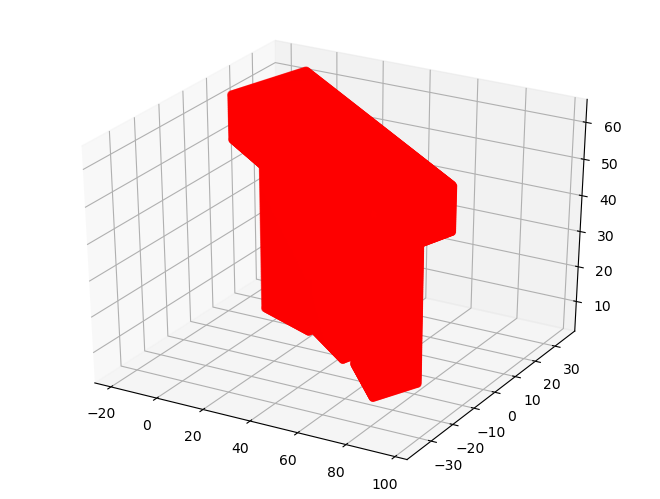

In [12]:
#绘制
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.array(points_filtered)[:,0], np.array(points_filtered)[:,1], np.array(points_filtered)[:,2], c='r')
plt.show()
